In [1]:
#pip install geopy

In [2]:
import geopandas as gpd
import pandas as pd

# Load the birth cities dataset
df = pd.read_csv('nobel.csv')
birth_countries_df = df[['awardYear' , 'birth_country','category']]
birth_countries_peace_df=birth_countries_df[birth_countries_df['category']=='Peace']

In [3]:
import matplotlib as plt

In [4]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
war_countries_df = pd.read_csv('war.csv')
#war_countries_df.columns.values.tolist()

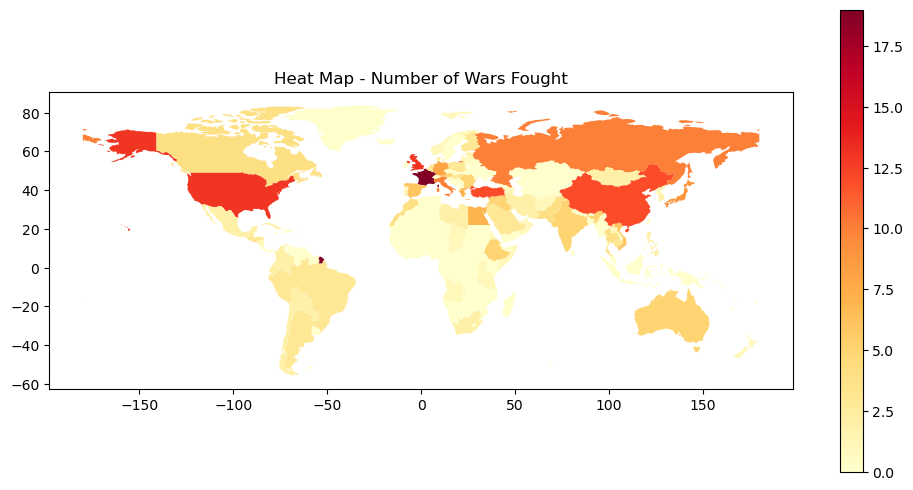

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter out Antarctica
world_map = world_map[world_map.name != 'Antarctica']

war_countries_df = pd.read_csv('war.csv')

# Join the birth country data with the world map data
war_country_counts = war_countries_df.groupby('StateName').size().reset_index(name='war_count')
world_map = world_map.merge(war_country_counts, left_on='name', right_on='StateName',how='left')

world_map['war_count'].fillna(0, inplace=True)

# Create the chloropleth map
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
world_map.plot(column='war_count', cmap='YlOrRd', legend=True, ax=ax)
ax.set_title('Heat Map - Number of Wars Fought')

plt.show()

In [6]:
birth_country_peace_counts = birth_countries_peace_df.groupby(['birth_country','awardYear']).size().reset_index(name='birth_count')
birth_country_peace_counts

,birth_country,awardYear,birth_count
0,Argentina,1936,1
1,Argentina,1980,1
2,Austria,1911,1
3,Austrian Empire,1905,1
4,Austrian Empire,1907,1
...,...,...,...
94,United Kingdom,1937,1
95,United Kingdom,1959,1
96,Vietnam,1973,1
97,Yemen,2011,1


In [12]:
import pandas as pd
import plotly.express as px

# Load the data
#birth_country = pd.read_csv('birth_country_data.csv')
birth_country_peace_counts['decade'] = birth_country_peace_counts['awardYear'].apply(lambda x: str(x)[:3] + '0s')
birth_country_peace_counts.sort_values(by='awardYear')
decade_order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# Define discrete color labels and ranges
color_labels = {0: '0', 5: '5', 10: '10', 20: '20', 30: '30', 40: '40', 50: '50'}
color_ranges = [0, 5, 10, 20, 30, 40, 50, birth_country_peace_counts['birth_count'].max()]

# Create a choropleth map figure
fig = px.choropleth(birth_country_peace_counts, 
                    locations='birth_country', 
                    locationmode='country names',
                    color='birth_count', 
                    hover_name='birth_country', 
                    animation_frame='decade', 
                    range_color=[0, birth_country_peace_counts['birth_count'].max()],
                    color_discrete_map=color_labels,
                    color_continuous_midpoint=25,
                    color_continuous_scale='Blues',
                    category_orders={'decade': decade_order},
                    scope='world',
                    labels={'birth_count':'Count - Country of Origin'})

# Update the colorbar to show discrete labels
fig.update_coloraxes(colorbar_tickvals=color_ranges, colorbar_ticktext=list(color_labels.values()))

# Set the title and template
fig.update_layout(title='Countries of Origin - Nobel Peace Prize Winners by Decade', template='plotly_dark')

# Show the figure
fig.show()

In [13]:
import pandas as pd
import plotly.express as px

# Load the data
war_country_counts = war_countries_df.groupby(['StateName','EndYear1']).size().reset_index(name='war_count')
war_country_counts = war_country_counts[war_country_counts['EndYear1'] > 1900]
war_country_counts['decade'] = war_country_counts['EndYear1'].apply(lambda x: str(x)[:3] + '0s')
war_country_counts.sort_values(by='EndYear1')
decade_order = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# Create a choropleth map figure
fig = px.choropleth(war_country_counts, 
                    locations='StateName', 
                    locationmode='country names',
                    color='war_count', 
                    hover_name='StateName', 
                    animation_frame='decade', 
                    range_color=[0, war_country_counts['war_count'].max()],
                    color_continuous_scale='Blues',
                    category_orders={'decade': decade_order},
                    labels={'war_count': 'Count - Number of Wars'})

# Set the title and template
fig.update_layout(title='The End of War in Countries- by Decade', template='plotly_dark')

# Set tick values and labels for the colorbar
fig.update_layout(coloraxis_colorbar=dict(
    tickmode='array',
    tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    ticktext=[0, 1, 2, 3, 4, 5, 6, 7, '8+'],
    title='Count - Number of Wars'
))

# Show the figure
fig.show()

In [9]:
import pandas as pd
import plotly.express as px

# Load data
nobel_prizes = pd.read_csv('nobel.csv')

# Group by prize category and birth country, count the number of winners
winners_count = nobel_prizes.groupby(['category', 'birth_country'])['name'].count().reset_index(name='count')

# Get the top 3 birth countries for each category
top3_countries = winners_count.groupby('category').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

catlist=['Peace','Literature','Physics','Physiology or Medicine','Economic Sciences','Chemistry']
# Create a choropleth map figure
fig = px.choropleth(top3_countries, 
                    locations='birth_country', 
                    locationmode='country names',
                    color='count', 
                    hover_name='birth_country', 
                    animation_frame='category', 
                    range_color=[0, top3_countries['count'].max()],
                    color_continuous_scale='Blues',
                    )

# Set the title and template
fig.update_layout(title='Top 10 Countries of Origin of Nobel Prize Winners by Category', template='plotly_dark')

# Set the slider menu
slider_steps = []
for i in range(len(catlist)):
    step = dict(
        method='update',
        args=[{'frame': {'duration': 500, 'redraw': False},
               'fromcurrent': True, 'transition': {'duration': 0}}],
        label=catlist[i])
    slider_steps.append(step)

sliders = [dict(
    active=0,
    steps=slider_steps,
    len=1.0,
    x=0,
    y=0,
    pad=dict(t=10)
)]

fig.layout.sliders[0].currentvalue.font.color = 'white'
fig.layout.sliders[0].len = 1
fig.layout.sliders[0].x = 0.1
fig.layout.sliders[0].y = 0
fig.layout.sliders[0].pad = {'t': 50, 'b': 10}
fig.show()

In [10]:
#dropdown_options

In [11]:
import plotly.graph_objs as go
import pandas as pd

# Data for ten scientists with their positions and years of work
scientists = {
    'Bergius,1931':[('Wroclaw', 51.1079, 17.0385),('Heidelberg', 49.3988, 8.6724),('Mannheim-Rheinau', 49.4320, 8.5275),('Buenos Aires', -34.6037, -58.3816)],
    'Debye,1936':[('Maastricht', 50.8514, 6.6910), ('Berlin', 52.5200, 13.4050),('Ithaca', 42.4440,-76.5019)],
    'Prigogine,1977':[('Moscow', 55.7558, 37.6173),('Brussels', 50.8476, 4.3572),('Austin', 30.2672,-97.7431),('Brussels', 50.8476, 4.35272)],
    'Deisenhofer,1988': [('Zusamaltheim', 48.5314, 10.6361),('Dallas', 32.7767, -96.7970),('Chevy Chase', 38.9949, -77.0772)],
    'Wuthrich,2002':[('Aarberg',47.0421,7.2751),('Zurich',47.3769, 8.5417), ('La Jolla', 32.8328,-117.2713)],
    'Tsien, 2008': [('New York', 40.7128, -74.0060), ('San Diego', 32.7157, -117.1611), ('Chevy Chase',33.9949, -77.0772), ('Eugene', 44.0521, -123.0868)],
    'Shimomura,2008':[('Kyoto', 35.0116, 135.7681), ('Woods Hole', 41.3136, -70.3947),('Massachusetts', 41.5265, -70.6731),('Nagasaki', 32.7503, 129.8779)],
    'Steitz,2009':[('Milwaukee', 43.0389, -87.9065),('New Haven', 41.3083, -72.9279), ('Chevy Chase',38.9949, -77.0772), ('Branford', 41.279903, -72.814117)],
    'Karplus,2013':[( 'Vienna', 48.2082, 16.3738), ('Strasbourg', 48.5734, 7.7521), ('Cambridge',42.3736, -71.1097)],
    'Yoshino,2019':[('Suita', 34.7594, 135.5165),('Tokyo', 35.6762, 139.6503),('Nagoya', 35.1815,136.9066)]

}

# Converting the data to a pandas DataFrame
data = []
for scientist in scientists:
    for position, lat, lon in scientists[scientist]:
        data.append({'Scientist': scientist, 'Position': position, 'Lat': lat, 'Lon': lon})
df = pd.DataFrame(data)

# Creating a list of traces, one for each scientist
traces = []
for scientist in scientists:
    trace = go.Scattergeo(
        name=scientist,
        lat=df[df['Scientist'] == scientist]['Lat'],
        lon=df[df['Scientist'] == scientist]['Lon'],
        text=df[df['Scientist'] == scientist]['Position'],
        mode='lines+markers',
        line=dict(width=2, color='red'),
        marker=dict(size=6, color='red'),
        visible=False
    )
    traces.append(trace)

# Creating the slider steps
steps = []
for i, scientist in enumerate(scientists):
    step = dict(
        method='update',
        args=[
            {'visible': [i == j for j in range(len(scientists))]},
            {'title': f'Mobility of Chemistry Prize-Winners - {scientist}'},
        ],
        label=scientist.capitalize()
    )
    steps.append(step)

# Creating the layout with slider
layout = dict(
    title='Mobility of Chemistry Prize-Winners',
    title_font=dict(color='red'),
    geo=dict(projection_type='natural earth', bgcolor='black'),
    updatemenus=[dict(
        type='buttons',
        buttons=list(steps),
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0.0025,
        xanchor='left',
        y=1.1,
        yanchor='top',
        font=dict(size=5,color='red'),   # set font size
        bgcolor='white',      # set background color
        bordercolor='gray',   # set border color
        borderwidth=1, 
        
    )],
    paper_bgcolor='black',
    plot_bgcolor='black'
)

# Adding the traces to the figure and creating it
fig = go.Figure(data=traces, layout=layout)

# Showing the figure
fig.show()